# Using _Word Embedding_ Layer in TensorFlow-2.8

- A word embedding is a class of approaches for representing words and documents using a dense vector representation.

- It is an improvement over the more traditional bag-of-word model encoding schemes where large sparse vectors were used to represent each word or to score each word within a vector to represent an entire vocabulary. These representations were sparse because the vocabularies were vast and a given word or document would be represented by a large vector comprised mostly of zero values.

- Instead, __in an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space__.

- __The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used__.

- __The position of a word in the learned vector space is referred to as its embedding__.

- Two popular examples of methods of learning word embeddings from text include:
    - Word2Vec
    - GloVe

- In addition to these carefully designed _word representation_ methods, a word embedding can be learned as part of a deep learning model. This can be a slower approach, but tailors the model to a specific training dataset.


[Reference](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/)

### Keras Embedding Layer

- Keras offers an [Embedding](https://keras.io/api/layers/core_layers/embedding/#embedding) layer that can be used for neural networks on text data.

- It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can also be performed using the [Tokenizer API](https://keras.io/api/preprocessing/text/#tokenizer) provided with Keras.

- _The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset_.

- It is a flexible layer that can be used in a variety of ways, such as:

    - It can be used stand-alone to learn a word embedding that can be saved and used in another model later.
    - It can be used as part of a deep learning model where the embedding is learned along with the model itself.
    - It can be used to load a pre-trained word embedding model, a type of transfer learning.

- __The Embedding layer is defined as the first hidden layer of a network__. It must specify 3 arguments:
    - __input_dim__: This is the _vocabulary size_ in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
    - __output_dim__: This is the embedded vector size of the vector space in which words will be embedded. __It defines the size of the output vectors from this layer for each word__. For example, it could be 32 or 100 or even larger. _Test different values for your problem_.
    - __input_length__: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

As an example, we define the following ```Embedding``` layer with a vocabulary of 200 (e.g. integer encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents that have 50 words each-

```e = Embedding(input_dim = 200, output_dim = 32, input_length = 50)```

- The Embedding layer has weights that are learned. If you save your model to file, this will include weights for the Embedding layer.

- __The output of the ```Embedding``` layer is a 2D vector with one embedding for each word in the input sequence of words (input document)__.

- __If you wish to connect a Dense layer directly to an Embedding layer, you must first flatten the 2D output matrix to a 1D vector using the ```Flatten``` layer__.


In [1]:
# Specify GPU to be used-
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES = 0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.8.0


In [4]:
# Check GPU availibility-
gpu_devices = tf.config.list_physical_devices('GPU')
# print(f"GPU: {gpu_devices}")

if gpu_devices:
    print(f"GPU: {gpu_devices}")
    details = tf.config.experimental.get_device_details(gpu_devices[0])
    print(f"GPU details: {details.get('device_name', 'Unknown GPU')}")
else:
    print("No GPU found")

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details: NVIDIA GeForce RTX 3080 Laptop GPU


#### Example of Learning an Embedding

- We look at a tpy example of how we can learn a word embedding while training a neural network on a text classification problem.

- We define a toy problem having 10 text documents, each with a comment about a piece of work a student submitted. Each text document is classified as positive _1_ or negative _0_. This is a simple sentiment analysis problem.

In [5]:
# Example documents-
docs = [
    'Well done!',
    'Good work',
    'Great effort',
    'nice work',
    'Excellent!',
    'Weak',
    'Poor effort!',
    'not good',
    'poor work',
    'Could have done better.'
]

# Define class labels-
labels = np.array([1,1,1,1,1,0,0,0,0,0])

In [6]:
# Vocabulary size-
voc_size = 50

In [75]:
# Example-
for words in docs:
    print(words)

Well done!
Good work
Great effort
nice work
Excellent!
Weak
Poor effort!
not good
poor work
Could have done better.


In [76]:
words

'Could have done better.'

In [77]:
one_hot(input_text = words, n = voc_size)

[13, 1, 7, 22]

In [9]:
# Get one-hot vectors-
onehot_vec = [one_hot(input_text = words, n = voc_size) for words in docs]

In [10]:
len(onehot_vec)

10

In [12]:
# Print an example sentence and it's one-hot vector-
docs[0], onehot_vec[0]

('Well done!', [40, 7])

#### Pad documents/sequences

The neural network expects all sentences to have the same size. To achieve this, _pad the input sentences_. For all of the given sentences, make it 4-word sentence.

In [15]:
# Pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(onehot_vec, maxlen = max_length, padding = 'pre')

In [16]:
print(padded_docs)

[[ 0  0 40  7]
 [ 0  0 33 45]
 [ 0  0 37 35]
 [ 0  0 47 45]
 [ 0  0  0 15]
 [ 0  0  0 17]
 [ 0  0 43 35]
 [ 0  0 37 33]
 [ 0  0 43 45]
 [13  1  7 22]]


In [18]:
padded_docs.shape, len(docs)

((10, 4), 10)

In [19]:
docs[0], onehot_vec[0]

('Well done!', [40, 7])

In [20]:
padded_docs[0]

array([ 0,  0, 40,  7])

### Embedding Layer

creates the _feature representation_ for any word.

In [21]:
# Specify feature-vector length-
embedding_dim = 10

In [55]:
# Sanity check-
print(f"Vocabulary size = {voc_size}, embedding dimensionality = "
      f"{embedding_dim} & padded sentence input length = {max_length}"
     )

Vocabulary size = 50, embedding dimensionality = 10 & padded sentence input length = 4


In [60]:
# Define Embedding layer-
model = Sequential()

model.add(
    Embedding(
        input_dim = voc_size, output_dim = embedding_dim,
        embeddings_initializer = 'uniform',
        embeddings_regularizer = None,
        input_length = max_length
    )
)

model.add(Flatten())

model.add(
    Dense(
        units = 1, activation = tf.keras.activations.sigmoid
    )
)

In [61]:
# Compile defined model-
model.compile(
    # loss = tf.keras.losses.MeanSquaredError(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

In [62]:
# Get model summary-
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 10)             500       
                                                                 
 flatten_1 (Flatten)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [28]:
print(f"Predicted embedding shape: {model.predict(padded_docs).shape}")
# number of sentences, maximum sentence length, embedding feature size

Predicted embedding shape: (10, 1)


In [ ]:
# Sanity check - Get random predictions-
# print(model.predict(embedded_docs))

In [32]:
docs[0], padded_docs[0]

('Well done!', array([ 0,  0, 40,  7]))

In [33]:
model.predict(padded_docs)[0].shape

(1,)

#### Remember

- The 3-D array has: _number of sentences, maximum sentence length, embedding feature size_. So, each sentence is represented with a 2-D array/matrix: _maximum sentence length, embedding vector size_. In this example, its (8, 20).

- Each of the 4 words in ```embedded_docs[0]``` is represented with a 10-dimensional embedding vector. Therefore, ```model.predict(embedded_docs)[0]``` has the shape (4, 10).

- For given ```padded_docs[0]``` example and its corresponding embedding ```model.predict(padded_docs)[0]```, the first 2 embedding vectors should be the same due to _pre-padding_ where the first 2 vectors are all 0s.

- __Each word is represented using a 10-dimensional embedding vector__.

In [ ]:
# np.all(model.predict(embedded_docs)[0][0] == model.predict(embedded_docs)[0][1])

In [ ]:
# np.all(model.predict(embedded_docs)[0][0] == model.predict(embedded_docs)[0][2])

In [ ]:
# np.all(model.predict(embedded_docs)[0][0] == model.predict(embedded_docs)[0][3])

In [63]:
model.predict(padded_docs)

array([[0.5030433 ],
       [0.509564  ],
       [0.50693744],
       [0.511469  ],
       [0.5002052 ],
       [0.5054037 ],
       [0.5070193 ],
       [0.50297856],
       [0.50877327],
       [0.51221883]], dtype=float32)

In [64]:
# Train model-
train_history = model.fit(
    x = padded_docs, y = labels,
    epochs = 50, batch_size = 8,
    verbose = 1
)

Epoch 1/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6990 - accuracy: 0.3000
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 0.6807 - accuracy: 0.9000
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6676 - accuracy: 0.8000
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 0.6530 - accuracy: 0.7000
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 0.6394 - accuracy: 0.7000
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6241 - accuracy: 0.9000
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6076 - accuracy: 0.9000
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: 0.5894 - accuracy: 0.9000
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 0.5695 - accuracy: 0.9000
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 0.5491 - accuracy: 0.9000
Epoch 11/50
2/2 [======================

In [65]:
# Evaluate trained model-
loss, accuracy = model.evaluate(padded_docs, labels, verbose = 0)
print(f"Trained accuracy = {accuracy * 100:.2f}%")

Trained accuracy = 100.00%


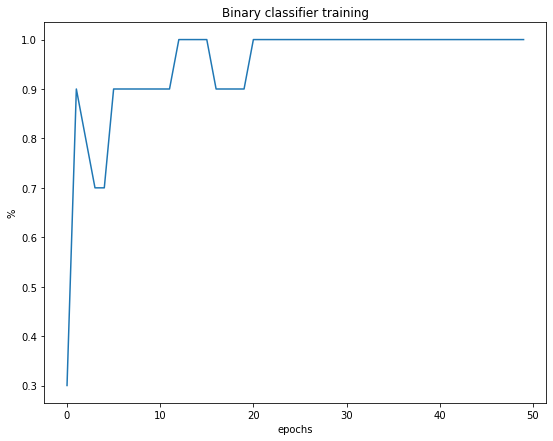

In [71]:
plt.figure(figsize = (9, 7))
plt.plot(train_history.history['accuracy'])
plt.xlabel("epochs")
plt.ylabel("%")
plt.title("Binary classifier training")
plt.show()

In [72]:
# Remember from above-
print(f"Vocabulary size = {voc_size}, embedding dimensionality = "
      f"{embedding_dim} & padded sentence input length = {max_length}"
     )

Vocabulary size = 50, embedding dimensionality = 10 & padded sentence input length = 4


#### NOTE: For each of the words in the vocabulary, you have a vector of embedding dimensionality size.

For the 50 words in the vocabulary, each of them are represented using a (dense) embedding vector of 10-dimensions.

In [73]:
# Extract trained embedding layer weights-
model.get_weights()[0].shape
# Or-
# model.layers[0].embeddings.numpy().shape

(50, 10)

In [74]:
# Get trained embedding weights for first 5 words in the vocabulary-
model.layers[0].embeddings.numpy()[:5]

array([[-0.0865592 ,  0.01758295, -0.1318761 , -0.06335241, -0.07219101,
         0.0177235 , -0.03264572,  0.06333083,  0.03082072,  0.06642012],
       [-0.3113638 ,  0.3509334 ,  0.20027603,  0.3017286 , -0.32910112,
         0.29107732, -0.22193152, -0.2630986 ,  0.34740108, -0.21362609],
       [ 0.03834507,  0.01518479,  0.02535285,  0.02351787,  0.02916468,
         0.009999  ,  0.04440549, -0.02499225, -0.01021707,  0.04965314],
       [ 0.02070804, -0.02125915,  0.02746493,  0.02757292,  0.03757313,
        -0.03164186, -0.0162307 ,  0.00324904,  0.02471043, -0.01834757],
       [ 0.0195758 , -0.00929439,  0.03243304, -0.04528047,  0.00744834,
         0.03022804, -0.01853026, -0.01680719,  0.04527246,  0.01152835]],
      dtype=float32)